In [2]:
import os
import pandas as pd 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [3]:
pwd

'C:\\Users\\TrinaNaskar\\Documents\\Daimler\\New Code\\CODES-Steel'

## Data input

### Input and Transforms

In [4]:
series_x = read_csv('SteelDataset_2009.csv',parse_dates=[1], index_col=0)

## Plot the Data

C:\Users\TrinaNaskar\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


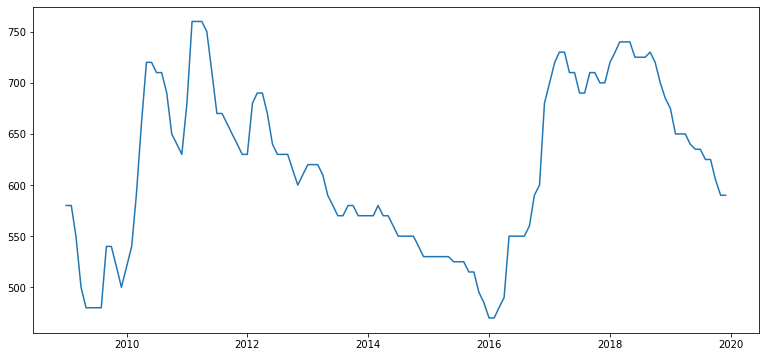

In [5]:
pyplot.figure(figsize = (13,6))
series_x['Price'] = series_x['Price'].astype(str).astype(float)
series_x.index = pd.to_datetime(series_x.index)
pyplot.plot(series_x)
pyplot.show()

## 2 Year Data Split

In [6]:
#divide into train and validation set
train_x= series_x[:108]
valid_x = series_x[108:]

In [7]:
len(valid_x)

24

## Build the Model

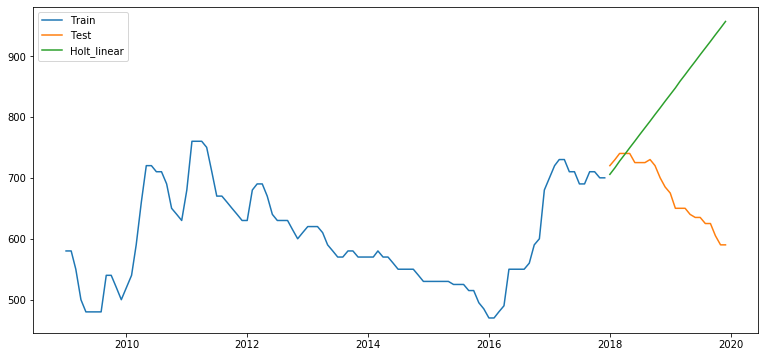

In [8]:
import statsmodels.api as sm

y_hat_avg = valid_x.copy()
fit1 = Holt(np.asarray(train_x['Price'])).fit(smoothing_level = 0.3,smoothing_slope = 1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid_x))
plt.figure(figsize=(13,6))
plt.plot(train_x['Price'], label='Train')
plt.plot(valid_x['Price'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

## MAPE Calculation

In [11]:
ape =  abs(valid_x['Price'] - y_hat_avg['Holt_linear'])/valid_x['Price']
mape = sum(ape)/len(ape)
print(mape)

0.24758852317949162


## 1 Year Data Split

In [12]:
#divide into train and validation set
train_x= series_x[:120]
valid_x = series_x[120:]

In [13]:
len(valid_x)

12

## Builld the Model

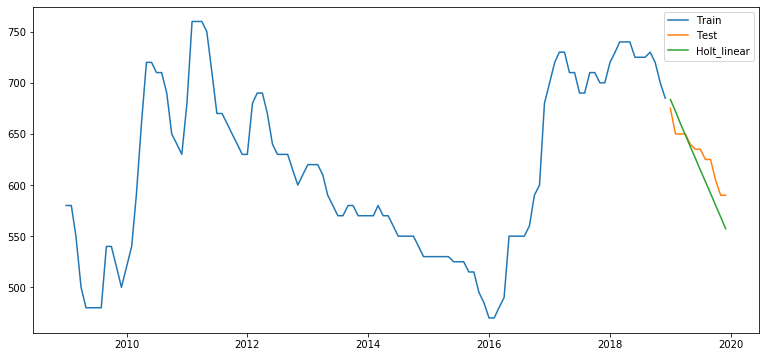

In [14]:
import statsmodels.api as sm

y_hat_avg = valid_x.copy()
fit1 = Holt(np.asarray(train_x['Price'])).fit(smoothing_level = 0.3,smoothing_slope = 1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid_x))
plt.figure(figsize=(13,6))
plt.plot(train_x['Price'], label='Train')
plt.plot(valid_x['Price'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

## MAPE Calculation

In [15]:
ape =  abs(valid_x['Price'] - y_hat_avg['Holt_linear'])/valid_x['Price']
mape = sum(ape)/len(ape)
print(mape)

0.027794162234178816
